In [42]:
import numpy
import math
from scipy import stats
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
LineRatios_file = fits.open("lineratios_1RE_allspax_18Sept2020.fits", memmap=True)
LineRatios_table = Table(LineRatios_file[1].data)

In [44]:
Nii_Oii = numpy.array(LineRatios_table['nii_oii'])
Plateifus = numpy.array(LineRatios_table['plateifu'])


In [45]:
Plateifu_sample = ['7957-12701', '7958-3704', '7992-9101', '8148-6102', '8439-1902', '8446-3702', '8935-3704', '9183-3702', '9892-3702', '8243-3701', '8453-3703', '8483-1902', '8948-6102', '8554-12704', '8248-3701', '8551-9101', '8588-3704', '8717-6101', '8942-6102', '9492-6104', '10001-3704', '10220-9101', '10499-3701', '10499-6102', '10516-3701', '7957-6102', '7960-3702', '7979-3701', '7991-3704', '7991-6101', '7991-6104', '7993-12704', '8134-6102', '8135-6103', '8137-1901', '8137-3703', '8138-3702', '8139-6101', '8145-3702', '8150-6102', '8155-3702', '8239-3701', '8244-6104', '8248-6104', '8249-12705', '8252-12702', '8255-1902', '8313-12704', '8313-6102', '8317-3702', '8322-12705', '8326-1902', '8326-3701', '8443-6102', '8446-9101', '8450-6101', '8452-6102', '8453-3702', '8456-1902', '8458-9102', '8461-1902', '8484-1901', '8484-3702', '8550-12701', '8588-12701', '8601-6101', '8623-6102', '8626-3701', '8626-3704', '8712-12704', '8712-12705', '8715-6104', '8719-3701', '8939-12703', '8948-12702', '8985-12702', '8989-9101', '8992-6103', '8997-6104', '8999-6102', '9036-9101', '9040-6101', '9046-12702', '9086-6103', '9088-6103', '9095-1902', '9182-6104', '9184-12704', '9196-12701', '9490-12705', '9500-12704', '9506-6104', '9511-1901', '9513-3702', '9514-3704', '9864-6101', '9865-3704']

Plateifu_control_1 = ['10517-3702', '8252-12701', '8317-6101', '8338-12704', '8552-6101', '8711-6103', '8995-12702', '10517-9101', '8149-9101', '8447-1901', '8716-12703', '8981-12705', '8989-12705', '10499-3702', '8155-3703', '8438-6102', '9497-3703', '10221-9101', '10503-12703', '10512-12702', '10512-6102', '10512-9102', '10514-12705', '10514-9102', '10516-12701', '10516-6104', '7443-6102', '7495-12704', '7975-9102', '7992-6104', '7993-12701', '7993-1902', '8078-12701', '8078-6103', '8080-6104', '8084-12703', '8137-12703', '8140-3701', '8141-12703', '8149-3704', '8241-12703', '8241-6102', '8243-12704', '8244-6102', '8315-9102', '8325-12703', '8439-12703', '8443-6103', '8449-12702', '8482-12705', '8549-12704', '8550-12704', '8553-9101', '8554-12702', '8555-12705', '8567-3701', '8588-12704', '8591-12705', '8592-6102', '8601-9101', '8604-12701', '8611-9102', '8612-12703', '8624-9102', '8625-12703', '8626-3703', '8713-9102', '8715-12701', '8932-3701', '8943-1901', '8944-12703', '8944-9101', '8982-9101', '8983-3703', '8989-12702', '8990-9102', '8992-12702', '8993-12702', '8996-12701', '9000-12702', '9028-6101', '9029-12702', '9037-12703', '9040-6104', '9091-9101', '9182-9102', '9194-12701', '9195-3703', '9497-12703', '9501-12701', '9505-6104', '9509-3702', '9509-6103', '9511-12704', '9887-12701', '9888-9101', '9889-6103']

Plateifu_control_2 = ['10220-1902', '10503-6103', '7495-6103', '8156-1901', '8317-3704', '8322-1902', '8325-1902', '8449-1902', '8451-1901', '8553-3701', '8940-3702', '9049-1902', '9485-12704', '9509-1902', '9862-12704', '7992-3701', '8086-3701', '8243-3702', '8319-3702', '8329-1902', '8456-3704', '8940-3701', '8978-3704', '8980-6103', '9028-3702', '9490-3703', '9491-1901', '8154-12702', '10217-3704', '8140-1901', '8259-6102', '8450-12703', '8950-3702', '9037-3701', '9043-1901', '9507-9102', '10216-3704', '10217-6102', '10221-6104', '10504-3703', '10514-6104', '10516-3704', '10519-1901', '7443-12701', '7957-1901', '7975-6102', '7979-6102', '8077-3701', '8077-6101', '8078-6102', '8081-6102', '8139-9102', '8141-12705', '8141-6101', '8143-6104', '8158-3701', '8158-6102', '8249-6104', '8313-6101', '8330-9102', '8439-12702', '8443-3702', '8444-9101', '8448-6103', '8450-6104', '8484-6102', '8547-3703', '8550-6101', '8603-3704', '8615-3704', '8625-12701', '8626-12701', '8656-3702', '8940-6104', '8950-6103', '8984-3703', '8984-6104', '8992-6102', '8992-9102', '8997-6101', '9026-12705', '9042-6101', '9088-3702', '9090-3702', '9183-3704', '9193-6101', '9501-3702', '9508-6102', '9509-3704', '9511-6102', '9863-3702', '9866-1902', '9881-12704', '9882-9101', '9886-1901', '9886-9102', '9889-3701']

In [46]:
R = numpy.ma.log10(Nii_Oii)
tplogoh_nii_oii = numpy.ma.log10(1.54020 + 1.26602 * R + 0.167977 * R ** 2) + 8.93


In [47]:

def values(parameter_array, plateifu_array):
    indices = []
    for index, plateifu in enumerate(Plateifus):
        if plateifu in plateifu_array:
            indices.append(index)
    print("Matched:", len(indices), "out of 97")
    value = [parameter_array[x] for x in indices]
    return value

def histograms(title, parameter):
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.title("Histogram showing " + title)
    value0 = values(parameter, Plateifu_sample)
    value1 = values(parameter, Plateifu_control_1)
    plt.hist(value0, bins=15, alpha=0.4, label='Sample: HI detection Low SFR')
    plt.hist(value1, bins=15, alpha=0.4, label='Control I: HI detection High SFR', hatch='...', fc="white", ec="black")
    plt.legend()
    plt.show()
    print(stats.ks_2samp(value0, value1))
    print("----------------------------------------------------------------------------------------------------")
    plt.xlabel(title)
    plt.ylabel("Frequency")
    plt.title("Histogram showing " + title)
    value0 = values(parameter, Plateifu_sample)
    value2 = values(parameter, Plateifu_control_2)
    plt.hist(value0, bins=15, alpha=0.4, label='Sample: HI detection Low SFR')
    plt.hist(value2, bins=15, alpha=0.4, label='Control II: HI non-detection Low SFR', hatch='...', fc="white", ec="black")
    plt.legend()
    plt.show()
    print(stats.ks_2samp(value0, value2))

Matched: 97 out of 97
Matched: 97 out of 97


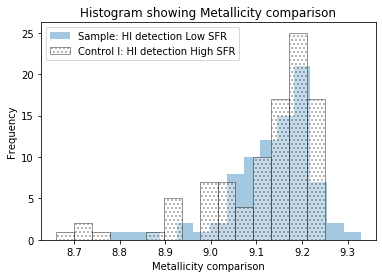

KstestResult(statistic=0.1958762886597938, pvalue=0.04816170765267925)
----------------------------------------------------------------------------------------------------
Matched: 97 out of 97
Matched: 96 out of 97


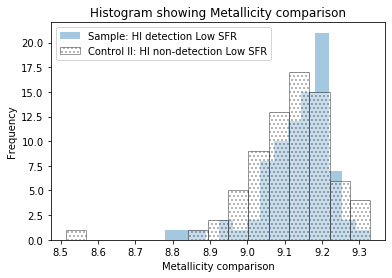

KstestResult(statistic=0.13692010309278352, pvalue=0.2979154642358538)


In [49]:
histograms("Metallicity comparison", tplogoh_nii_oii)